# Pré-processando os dados do ENEM 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_columns", 200)
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
dados_enem_2021 = pd.read_csv("MICRODADOS_ENEM_2021.csv", delimiter = ';', encoding = 'ISO-8859-1')

In [3]:
dados_enem_2021.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.00,892.00,NaN,NaN,574.60,472.60,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.00,882.00,891.00,901.00,505.90,551.80,498.30,461.50,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.00,0,"2,304,202.00",Crato,23.00,CE,2.00,1.00,1.00,2304202,Crato,23,CE,1,1,1,1,911.00,880.00,890.00,902.00,580.70,678.90,638.90,659.50,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.00,0,"2,311,603.00",Redenção,23.00,CE,2.00,1.00,1.00,2300150,Acarape,23,CE,1,1,1,1,912.00,882.00,891.00,901.00,497.70,532.40,457.60,582.60,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [4]:
dados_enem_2021.describe(include = 'all')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,"3,389,832.00","3,389,832.00","3,389,832.00",3389832,"3,389,832.00","3,389,832.00","3,389,832.00","3,389,832.00","3,389,832.00","3,389,832.00","1,096,828.00","3,389,832.00","813,806.00",813806,"813,806.00",813806,"813,806.00","813,806.00","813,806.00","3,389,832.00",3389832,"3,389,832.00",3389832,"3,389,832.00","3,389,832.00","3,389,832.00","3,389,832.00","2,245,844.00","2,378,379.00","2,378,379.00","2,245,844.00","2,245,844.00","2,378,379.00","2,378,379.00","2,245,844.00",2245844,2378379,2378379,2245844,"3,389,832.00",2245844,2378379,2378379,2245844,"2,378,379.00","2,378,379.00","2,378,379.00","2,378,379.00","2,378,379.00","2,378,379.00","2,378,379.00",3389830,3389830,3389830,3389830,"3,389,830.00",3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5271,NaN,27,NaN,NaN,NaN,NaN,1712,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2244621,2371495,2375813,2244141,NaN,8,8,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,6,6,NaN,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.............................................,.............................................,.....99999.......................................,.............................................,NaN,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,NaN,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,D,A,A,B
freq,NaN,NaN,NaN,2090526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37692,NaN,139473,NaN,NaN,NaN,NaN,141840,NaN,509954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393,4632,1297,453,NaN,550219,581727,580487,550219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,955155,1148575,779251,1407976,NaN,932838,3106217,2213952,1662443,1764276,2597283,3169841,1884073,2099797,2964326,1698583,3282971,2579763,2217847,2733449,2642067,1002077,2865104,1436524,3037632
mean,"210,052,740,005.62","2,021.00",5.31,NaN,1.05,2.04,1.03,1.61,2.58,1.40,1.01,0.13,"3,182,761.61",NaN,31.68,NaN,2.47,1.03,1.02,"3,104,218.07",NaN,30.90,NaN,0.66,0.70,0.70,0.66,916.05,886.75,896.65,906.14,491.79,519.94,502.56,535.08,NaN,NaN,NaN,NaN,0.47,NaN,NaN,NaN,NaN,1.14,119.27,138.03,115.31,128.19,112.71,613.50,NaN,NaN,NaN,NaN,3.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"996,240.25",0.00,3.90,NaN,0.41,1.02,0.20,0.72,4.28,0.59,0.08,0.34,"1,041,347.87",NaN,10.39,NaN,0.94,0.18,0.20,"1,011,035.27",NaN,10.08,NaN,0.47,0.46,0.46,0.47,25.86,27.89,27.51,26.21,80.57,95.79,79.16,110.63,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,0.79,33.92,45.63,36.34,38.83,60.06,190.71,NaN,NaN,NaN,NaN,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,"210,051,014,329.00","2,021.00",1.00,NaN,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,"1,100,015.00",NaN,11.00,NaN,1.00,1.00,1.00,"1,100,015.00",NaN,11.00,

In [5]:
dados_enem_2021.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

### Pré-processando os dados

1. Serão removidas as colunas que não serão utilizadas na análise. Embora essas colunas estejam associadas às notas dos alunos, o modelo estatístico utilizado pelo ENEM, a teoria de resposta ao item, estabelece essas relações ao atribuir as notas. Como não serão realizadas análises semelhantes, as colunas listadas abaixo serão excluídas

In [6]:
dados_enem_2021.duplicated().sum()

0

In [7]:
colunas_remove = ['NU_ANO', 'TP_NACIONALIDADE', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN',
                  'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN', 'TX_GABARITO_CH','TX_GABARITO_LC', 
                  'TX_GABARITO_MT']

df = dados_enem_2021.drop(columns = colunas_remove)
df.shape

(3389832, 62)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 62 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               int64  
 8   TP_ENSINO               float64
 9   IN_TREINEIRO            int64  
 10  CO_MUNICIPIO_ESC        float64
 11  NO_MUNICIPIO_ESC        object 
 12  CO_UF_ESC               float64
 13  SG_UF_ESC               object 
 14  TP_DEPENDENCIA_ADM_ESC  float64
 15  TP_LOCALIZACAO_ESC      float64
 16  TP_SIT_FUNC_ESC         float64
 17  CO_MUNICIPIO_PROVA      int64  
 18  NO_MUNICIPIO_PROVA      object 
 19  CO_UF_PROVA             int64  
 20  SG_UF_PROVA             object 
 21  TP_PRESENCA_CN          int64  

2. Dados ausentes

Será definida uma função que retorna a porcentagem de valores ausentes (NaN) na 'df' para colunas com dados ausentes maiores que zero

In [9]:
def porcentagem_de_nan(data_frame):
    n = data_frame.NU_INSCRICAO.count()
    na = data_frame.isna().sum()
    na_percentagem = (na/n)*100
    return na_percentagem[na>0]

In [10]:
porcentagem_de_nan(df)

TP_ENSINO                67.64
CO_MUNICIPIO_ESC         75.99
NO_MUNICIPIO_ESC         75.99
CO_UF_ESC                75.99
SG_UF_ESC                75.99
TP_DEPENDENCIA_ADM_ESC   75.99
TP_LOCALIZACAO_ESC       75.99
TP_SIT_FUNC_ESC          75.99
NU_NOTA_CN               33.75
NU_NOTA_CH               29.84
NU_NOTA_LC               29.84
NU_NOTA_MT               33.75
TP_STATUS_REDACAO        29.84
NU_NOTA_COMP1            29.84
NU_NOTA_COMP2            29.84
NU_NOTA_COMP3            29.84
NU_NOTA_COMP4            29.84
NU_NOTA_COMP5            29.84
NU_NOTA_REDACAO          29.84
Q001                      0.00
Q002                      0.00
Q003                      0.00
Q004                      0.00
Q005                      0.00
Q006                      0.00
Q007                      0.00
Q008                      0.00
Q009                      0.00
Q010                      0.00
Q011                      0.00
Q012                      0.00
Q013                      0.00
Q014    

Os dados ausentes com taxa de 0% serão excluídos, uma vez que são estatisticamente insignificantes.

In [11]:
quest_socio_econo = ['Q001','Q002','Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                    'Q014','Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q023','Q024','Q025']
df.dropna(subset = quest_socio_econo, inplace = True)

In [12]:
porcentagem_de_nan(df)

TP_ENSINO                67.64
CO_MUNICIPIO_ESC         75.99
NO_MUNICIPIO_ESC         75.99
CO_UF_ESC                75.99
SG_UF_ESC                75.99
TP_DEPENDENCIA_ADM_ESC   75.99
TP_LOCALIZACAO_ESC       75.99
TP_SIT_FUNC_ESC          75.99
NU_NOTA_CN               33.75
NU_NOTA_CH               29.84
NU_NOTA_LC               29.84
NU_NOTA_MT               33.75
TP_STATUS_REDACAO        29.84
NU_NOTA_COMP1            29.84
NU_NOTA_COMP2            29.84
NU_NOTA_COMP3            29.84
NU_NOTA_COMP4            29.84
NU_NOTA_COMP5            29.84
NU_NOTA_REDACAO          29.84
dtype: float64

Para os dados ausentes das localizações dos parcipantes

In [13]:
local_columns = ['CO_MUNICIPIO_ESC','CO_MUNICIPIO_PROVA','CO_UF_PROVA', 'CO_UF_ESC', 'NO_MUNICIPIO_ESC', 'NO_MUNICIPIO_PROVA',
                'SG_UF_PROVA','SG_UF_ESC']
df[local_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389830 entries, 0 to 3389830
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CO_MUNICIPIO_ESC    float64
 1   CO_MUNICIPIO_PROVA  int64  
 2   CO_UF_PROVA         int64  
 3   CO_UF_ESC           float64
 4   NO_MUNICIPIO_ESC    object 
 5   NO_MUNICIPIO_PROVA  object 
 6   SG_UF_PROVA         object 
 7   SG_UF_ESC           object 
dtypes: float64(2), int64(2), object(4)
memory usage: 232.8+ MB


Alguns dados de localização são categóricos e outros são numéricos, portanto, uma matriz de correlação será utilizada para avaliar como essas variáveis estão relacionadas. Observa-se que dados categóricos não apresentam correlações lineares, no entanto, no dicionário disponibilizado em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem, é possível verificar que os códigos CO são únicos.

In [14]:
df_local = df[local_columns]
corr_local_matriz = df_local.corr()

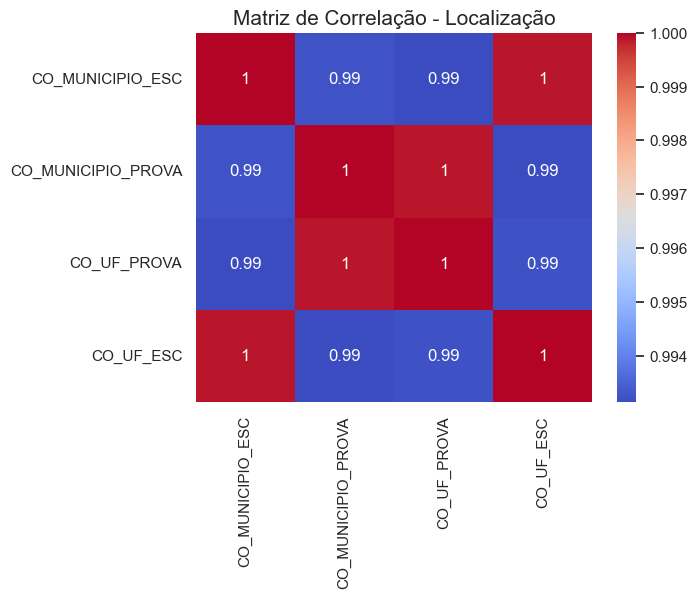

In [15]:
sns.heatmap(corr_local_matriz, annot = True, cmap = "coolwarm")
plt.title('Matriz de Correlação - Localização', fontsize = 15)
plt.show()

Existe uma forte correlação entre os dados numéricos relacionados à localização dos participantes. Assim, para excluir dados ausentes, serão utilizadas as colunas 'CO_UF_PROVA' e 'SG_UF_PROVA', uma vez que estão completas. Além disso, as colunas podem ser renomeadas para tornar o conjunto de dados mais legível e fácil de trabalhar.

In [16]:
df_local.isnull().sum()

CO_MUNICIPIO_ESC      2576024
CO_MUNICIPIO_PROVA          0
CO_UF_PROVA                 0
CO_UF_ESC             2576024
NO_MUNICIPIO_ESC      2576024
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
SG_UF_ESC             2576024
dtype: int64

In [17]:
df.drop(columns = ['CO_MUNICIPIO_ESC','CO_MUNICIPIO_PROVA', 'CO_UF_ESC', 'NO_MUNICIPIO_ESC', 'NO_MUNICIPIO_PROVA','SG_UF_ESC'],
       inplace = True)
df.rename(columns = {'CO_UF_PROVA': 'CO_UF', 'SG_UF_PROVA': 'SG_UF' })

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_UF,SG_UF,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,5,F,1,1,1,3,1,NaN,0,NaN,NaN,NaN,31,MG,0,1,1,0,NaN,574.60,472.60,NaN,1,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,12,M,1,1,1,11,1,NaN,0,NaN,NaN,NaN,27,AL,1,1,1,1,505.90,551.80,498.30,461.50,1,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,13,F,3,1,1,15,1,NaN,0,NaN,NaN,NaN,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,3,M,1,3,2,0,2,1.00,0,2.00,1.00,1.00,23,CE,1,1,1,1,580.70,678.90,638.90,659.50,0,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2,F,1,3,2,0,2,1.00,0,2.00,1.00,1.00,23,CE,1,1,1,1,497.70,532.40,457.60,582.60,1,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389826,210052408816,9,F,1,2,1,6,1,NaN,0,NaN,NaN,NaN,51,MT,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,D,C,B,3.00,C,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
3389827,210053249138,7,F,1,3,1,0,1,NaN,0,NaN,NaN,NaN,52,GO,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,5.00,C,C,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,7,F,1,1,1,5,1,NaN,0,NaN,NaN,NaN,41,PR,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,F,4.00,G,A,C,E,C,A,C,C,B,A,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,13,F,1,3,1,15,1,NaN,0,NaN,NaN,NaN,33,RJ,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,1.00,F,A,B,B,A,A,B,B,B,A,B,A,A,A,A,A,B,A,B,B


In [18]:
porcentagem_de_nan(df)

TP_ENSINO                67.64
TP_DEPENDENCIA_ADM_ESC   75.99
TP_LOCALIZACAO_ESC       75.99
TP_SIT_FUNC_ESC          75.99
NU_NOTA_CN               33.75
NU_NOTA_CH               29.84
NU_NOTA_LC               29.84
NU_NOTA_MT               33.75
TP_STATUS_REDACAO        29.84
NU_NOTA_COMP1            29.84
NU_NOTA_COMP2            29.84
NU_NOTA_COMP3            29.84
NU_NOTA_COMP4            29.84
NU_NOTA_COMP5            29.84
NU_NOTA_REDACAO          29.84
dtype: float64

As colunas com mais de 65% de dados ausentes serão excluídas, uma vez que não há como substituir esses valores com nenhum outro dado disponível, e também não serão úteis nas análises a serem realizadas. 

In [19]:
escola = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC']
df.drop(columns = escola, inplace = True)
porcentagem_de_nan(df)

NU_NOTA_CN          33.75
NU_NOTA_CH          29.84
NU_NOTA_LC          29.84
NU_NOTA_MT          33.75
TP_STATUS_REDACAO   29.84
NU_NOTA_COMP1       29.84
NU_NOTA_COMP2       29.84
NU_NOTA_COMP3       29.84
NU_NOTA_COMP4       29.84
NU_NOTA_COMP5       29.84
NU_NOTA_REDACAO     29.84
dtype: float64

Existem muitos dados ausentes no conjunto de dados. Para lidar com isso, é necessário identificar os participantes ausentes, ou seja, aqueles que não compareceram nas provas. Se valores NaN foram atribuídos às colunas de notas desses participantes ausentes, a porcentagem de dados NaN diminuirá proporcionalmente quando os dados desses participantes forem excluídos do conjunto de dados. Contudo, as ausências dos participantes são importantes para análises descritivas, dessa forma isto será mantido em um arquivo separado, 'descricao_dados_enem_2021'.

In [20]:
df.to_csv('descricao_dados_enem_2021', index = False)

In [21]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
df[presenca].loc[(df[presenca] ==0).any(axis = 1)].value_counts()

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 1000149
                1               1               0                  138851
1               0               0               1                    7229
0               2               2               0                    3538
2               0               0               2                      18
dtype: int64

In [22]:
tot = df['NU_INSCRICAO'].count()
ausencia_em_todas = 1000149 
ausencia_em_alguma = 138851 + 7229 + 3538 + 18
porcentagem_de_alguma_falta = round((ausencia_em_alguma/tot) * 100 ,  2)
porcentagem_de_nenhuma_presenca = round((ausencia_em_todas/tot) * 100 , 2)
print('Porcentagem dos parcipantes que não compareceram em nenhuma prova: ', porcentagem_de_nenhuma_presenca)
print('Porcentagem dos parcipantes que não compareceram em alguma prova:  ', porcentagem_de_alguma_falta)

Porcentagem dos parcipantes que não compareceram em nenhuma prova:  29.5
Porcentagem dos parcipantes que não compareceram em alguma prova:   4.41


Há 1000149 participantes que não compareceram a nenhuma das provas. Portanto, 29,5% do total de participantes não compareceram a nenhuma prova, o que é aproximadamente o mesmo valor de dados ausentes nas colunas das notas. Para verificar a relação entre esses dados, criaremos um novo data frame chamado 'df_1', excluindo os participantes ausentes, e o compararemos com o data frame original, 'df'.

In [23]:
mask1 = df['TP_PRESENCA_CN'] == 0
mask2 = df['TP_PRESENCA_CH'] == 0
mask3 = df['TP_PRESENCA_LC'] == 0
mask4 = df['TP_PRESENCA_MT'] == 0
mask = mask1 | mask2 | mask3 | mask4

df_1 = df.drop(index=df[mask].index)
df_1.shape[0]

2240045

In [24]:
(df.shape[0] - df_1.shape[0]) == ausencia_em_todas + ausencia_em_alguma

True

In [25]:
df_1[presenca].loc[(df[presenca] == 0).any(axis = 1)].value_counts()

Series([], dtype: int64)

In [26]:
porcentagem_de_nan(df_1)

NU_NOTA_CN          0.06
NU_NOTA_CH          0.02
NU_NOTA_LC          0.02
NU_NOTA_MT          0.06
TP_STATUS_REDACAO   0.02
NU_NOTA_COMP1       0.02
NU_NOTA_COMP2       0.02
NU_NOTA_COMP3       0.02
NU_NOTA_COMP4       0.02
NU_NOTA_COMP5       0.02
NU_NOTA_REDACAO     0.02
dtype: float64

Observa-se que as porcentagens dos valores ausentes (NaN) diminuíram, portanto, conclui-se que a hipótese supracitada é verificada. Além disso, uma vez que as porcentagems de valores ausentes restantes são próximas de zero e repetidas, é recomendado excluir esses valores NaN. E as colunas das competências 1,2,3,4,5 ' serão excluídas porque não serão usados nas análises preditivas.

In [27]:
col_del = ['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
df_1.drop(columns = col_del, inplace = True)
dados_enem = df_1.dropna(subset = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_REDACAO'])
porcentagem_de_nan(dados_enem)

Series([], dtype: float64)

In [28]:
dados_enem.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210052384164,12,M,1,1,1,11,1,0,27,AL,1,1,1,1,505.90,551.80,498.30,461.50,1,1.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
3,210052128335,3,M,1,3,2,0,2,0,23,CE,1,1,1,1,580.70,678.90,638.90,659.50,0,1.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2,F,1,3,2,0,2,0,23,CE,1,1,1,1,497.70,532.40,457.60,582.60,1,1.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
8,210053417016,8,F,1,3,2,0,2,0,31,MG,1,1,1,1,487.40,476.50,450.70,493.40,0,1.00,520.00,B,B,B,B,2.00,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
9,210051128744,4,F,1,3,2,0,2,0,29,BA,1,1,1,1,507.60,539.20,494.60,413.30,1,1.00,380.00,D,D,D,B,2.00,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B


In [29]:
dados_enem.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,"2,238,106.00","210,052,741,688.22","996,937.59","210,051,014,329.00","210,051,878,044.25","210,052,741,199.50","210,053,602,623.50","210,054,466,282.00"
TP_FAIXA_ETARIA,"2,238,106.00",4.50,3.54,1.00,2.00,3.00,5.00,20.00
TP_ESTADO_CIVIL,"2,238,106.00",1.03,0.36,0.00,1.00,1.00,1.00,4.00
TP_COR_RACA,"2,238,106.00",1.99,1.02,0.00,1.00,2.00,3.00,6.00
TP_ST_CONCLUSAO,"2,238,106.00",1.72,0.74,1.00,1.00,2.00,2.00,4.00
TP_ANO_CONCLUIU,"2,238,106.00",2.00,3.80,0.00,0.00,0.00,2.00,15.00
TP_ESCOLA,"2,238,106.00",1.46,0.64,1.00,1.00,1.00,2.00,3.00
IN_TREINEIRO,"2,238,106.00",0.16,0.37,0.00,0.00,0.00,0.00,1.00
CO_UF_PROVA,"2,238,106.00",31.01,9.85,11.00,24.00,31.00,35.00,53.00
TP_PRESENCA_CN,"2,238,106.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00


O DataFrame 'dados_enem' está estruturado. Agora, exportando para outras análises

In [30]:
dados_enem.to_csv('dados_enem.csv', index = False)